<a href="https://colab.research.google.com/github/Phionanamugga/NLP_projects/blob/feature1/Spacy_FoodReviewsTTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End NLP Pipeline for Customer Sentiment Analysis of Amazon Food

## Problem Statement

Business Problem: Amazon seeks to enhance customer satisfaction by analyzing sentiment in the food sold on its website. Understanding whether reviews are  negative,positive, or neutral can guide marketing strategies,product improvements,  and customer service satisfaction.

Importance: Positive sentiment drives customer loyalty, while negative sentiment can harm brand reputation. An automated sentiment analysis system enables reducing manual review efforts ,real-time insights,  and enabling data-driven decisions.

Data Collection: We use the Food Reviews Dataset for Amazon, a publicly available dataset on Kaggle having 500,000 reviews by customer with star ratings (1-5). I have mapped out ratings to sentiments: 1-2 (Negative), 3 (Neutral), 4-5 (Positive). This dataset is ideal due to its  diversity, size,and relevance to retail.

NLP Task: The problem has been formulated as a multi-class text classification task, where the inputs are the review texts, and outputs are the sentiments (negative, positive, neutral).

Benefits: The pipeline will enable the company to prioritize customer concerns,monitor sentiment trends,  and improve product offerings, ultimately boosting revenue and customer retention.

System Design
The Natural_Langauage_Processing pipeline contains the following; connected sequentially to process textual data:

Data Collection: Load and sample the Amazon Food Reviews dataset to ensure manageability.

Data Augmentation: Use spaCy and augmenty for data augmentation to improve model robustness and address class imbalance

Preprocessing: Text has been cleaned by (removing stopwords, punctuation, lemmatize).

Feature Extraction: TF-IDF has been used for baseline models and BERT embeddings for better accuracy.

Model Training: A logistic regression model  has been tarined as the baseline and a fine tuning has been done using BERT model for better accuracy.
Evaluation: Assessment of precision,accuracy,  recall, F1-score, and confusion matrix has been done.
Discussion: Analyze results, limitations, and business implications.



1. Data Acquisition

We load a subset of the Amazon Reviews dataset (100,000 reviews) to balance computational efficiency and representativeness. The dataset is sourced from Amazon’s public repository.

In [2]:
# Importing libraries for the data collection
import numpy as np
import pandas as pd


In [6]:
# loading the Dataset
df_nlp = pd.read_csv("/content/sample_data/AmazonFoodReviews.csv", on_bad_lines='skip')

## 2. Data Exploration
Explore the dataset to understand its structure and distribution.

In [4]:
# Getting summary information i.e data type, null columns and column names
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
#Checking for the Summary description of the Dataset
df_nlp.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
# Checking for the headings in the dataset
df_nlp.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# Checking for the value counts of each star rating
print(df_nlp['Score'].value_counts())

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64


## 2.1 Sentiment Distribution Visualization
Visualize the distribution of sentiments in the original dataset to highlight class imbalance.

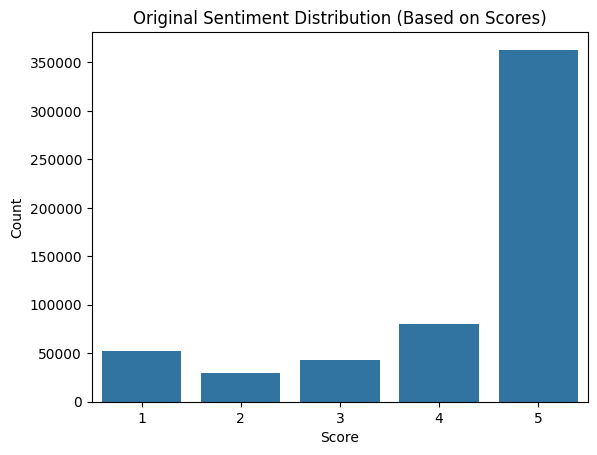

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution bar plot
sns.countplot(x='Score', data=df_nlp)
plt.title('Original Sentiment Distribution (Based on Scores)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

## 3. Data Augmentation with spaCy
To improve model robustness and address class imbalance (skew toward positive reviews), we perform data augmentation using spaCy. Techniques include synonym replacement (using WordNet) and custom token swapping, with a focus on augmenting negative and neutral reviews to balance the dataset.

In [ ]:
import nltk # For text mining/collection
import spacy # for data augmenttation to increase robustness
import random

nltk.download('wordnet')
from nltk.corpus import wordnet

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Map scores to sentiments
def map_sentiment(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df_nlp['Sentiment'] = df_nlp['Score'].apply(map_sentiment)

# Sample 100,000 reviews
df_sample = df_nlp.sample(100000, random_state=42)

# Define augmentation functions
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

def synonym_replacement(text, n=2):
    doc = nlp(text)
    new_tokens = []
    replaced = 0
    for token in doc:
        if token.pos_ in ['NOUN', 'ADJ', 'VERB'] and replaced < n:
            synonyms = get_synonyms(token.text.lower())
            if synonyms:
                new_tokens.append(synonyms[0])
                replaced += 1
                continue
        new_tokens.append(token.text)
    return ' '.join(new_tokens)

# Custom token swap augmentation
def custom_token_swap(text, level=0.1):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    n_swaps = int(len(tokens) * level)
    for _ in range(n_swaps):
        if len(tokens) > 1:
            idx1, idx2 = random.sample(range(len(tokens)), 2)
            tokens[idx1], tokens[idx2] = tokens[idx2], tokens[idx1]
    return ' '.join(tokens)

# Apply augmentation (2x for negative/neutral, 1x for positive)
augmented_texts = []
augmented_labels = []

for idx, row in df_sample.iterrows():
    original_text = row['Text']
    label = row['Sentiment']

    aug1 = synonym_replacement(original_text)
    aug2 = custom_token_swap(original_text, level=0.1)

    if label in ['negative', 'neutral']:
        augmented_texts.extend([original_text, aug1, aug2])
        augmented_labels.extend([label, label, label])
    else:
        augmented_texts.extend([original_text, aug1])
        augmented_labels.extend([label, label])

df_augmented = pd.DataFrame({'Text': augmented_texts, 'Sentiment': augmented_labels})
print(f"Original sample size: {len(df_sample)}, Augmented size: {len(df_augmented)}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 3.1 Augmented Sentiment Distribution Visualization
Visualize the sentiment distribution after augmentation to show how it balances the classes.

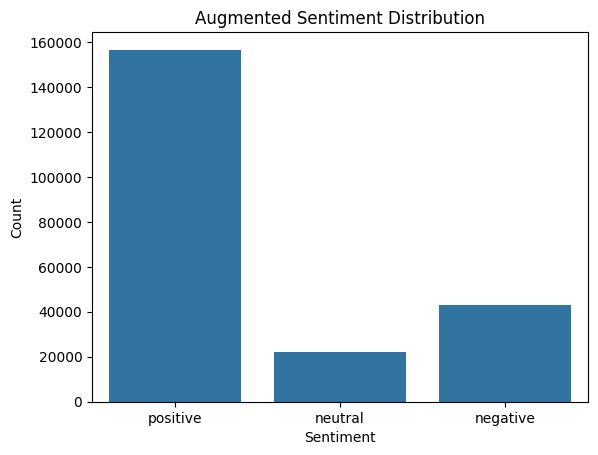

In [10]:
# Augmented sentiment distribution bar plot
sns.countplot(x='Sentiment', data=df_augmented)
plt.title('Augmented Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 4. Preprocessing
Clean the augmented text data by removing punctuation, stopwords, and applying lemmatization using spaCy.

In [12]:
import spacy
from string import punctuation

# Load spaCy model (use 'en_core_web_sm' for efficiency or 'en_core_web_lg' for better accuracy)
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])  # Disable unused components for speed

# Define preprocessing function for spaCy Doc objects
def preprocess_text(doc):
    # Process tokens: keep non-stopwords, non-punctuation, and lemmatize
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# Apply preprocessing with batch processing for efficiency
texts = df_augmented['Text'].tolist()
# Convert texts to lowercase before passing to nlp.pipe to ensure consistency
texts = [text.lower() for text in texts]
# Use nlp.pipe to process texts into Doc objects and apply preprocess_text
df_augmented['Processed_Text'] = [preprocess_text(doc) for doc in nlp.pipe(texts, batch_size=1000)]
print("Preprocessing completed")

Preprocessing completed


## 4.1 Word Clouds for Each Sentiment
Visualize the most common words in each sentiment class after preprocessing using word clouds.

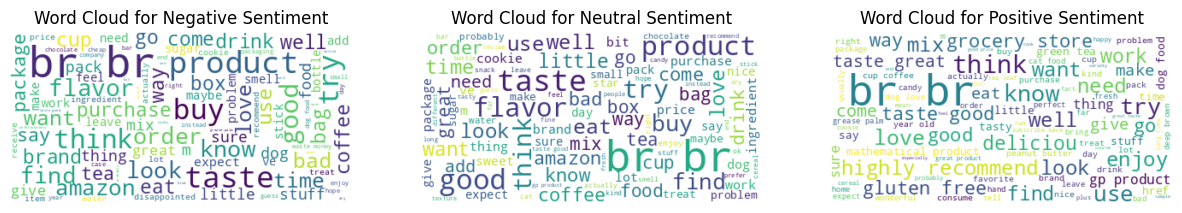

In [13]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
sentiments = ['negative', 'neutral', 'positive']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sent in enumerate(sentiments):
    text = ' '.join(df_augmented[df_augmented['Sentiment'] == sent]['Processed_Text'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {sent.capitalize()} Sentiment')
    axes[i].axis("off")

plt.show()

## 5. Feature Extraction
Extract features using TF-IDF for the baseline model and BERT embeddings for the advanced model.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# TF-IDF for baseline model
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df_augmented['Processed_Text'])
y = df_augmented['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Split data for baseline
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenize texts for BERT
def tokenize_for_bert(texts, max_length=128):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors='pt')
    return encodings

X_train, X_test, y_train_bert, y_test_bert = train_test_split(df_augmented['Text'], y, test_size=0.2, random_state=42)
train_encodings = tokenize_for_bert(X_train)
test_encodings = tokenize_for_bert(X_test)


## 5.1 Top TF-IDF Features Visualization
Visualize the top TF-IDF features for each sentiment class to show important words.

In [ ]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Function to plot top features for a class
def plot_top_features(coefficients, class_label):
    top_features = sorted(zip(coefficients, feature_names), reverse=True)[:10]
    top_scores, top_words = zip(*top_features)
    plt.barh(top_words, top_scores)
    plt.title(f'Top TF-IDF Features for {class_label}')
    plt.show()

# Assuming multi-class logistic regression, plot for each class
for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    plot_top_features(lr_model.coef_[i], label)

## 6. Model Training
Train a logistic regression model (baseline) and fine-tune a BERT model.

In [8]:
from sklearn.linear_model import LogisticRegression
from torch.utils.data import Dataset, DataLoader

# Baseline: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

# BERT Dataset
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, y_train_bert)
test_dataset = ReviewDataset(test_encodings, y_test_bert)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Fine-tune BERT
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_bert.to(device)
optimizer = torch.optim.AdamW(model_bert.parameters(), lr=5e-5)

# Training loop
model_bert.train()
for epoch in range(3):
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_bert(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1} completed")

## 6.1 BERT Training Loss Visualization
Visualize the training loss curve for BERT to show convergence.

In [ ]:
# Plot BERT training loss
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('BERT Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 7. Evaluation
Evaluate both models using accuracy, precision, recall, F1-score, and confusion matrix.

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr, target_names=['negative', 'neutral', 'positive']))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Evaluate BERT
model_bert.eval()
y_pred_bert = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model_bert(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        y_pred_bert.extend(preds.cpu().numpy())

print("BERT Evaluation:")
print(classification_report(y_test_bert, y_pred_bert, target_names=['negative', 'neutral', 'positive']))

# Confusion Matrix for BERT
cm_bert = confusion_matrix(y_test_bert, y_pred_bert)
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('BERT Confusion Matrix')
plt.show()

column names: Index(['Text', 'Sentiment'], dtype='object')


## 7.1 Model Metrics Comparison Visualization
Compare key metrics (accuracy, precision, recall, F1-score) between Logistic Regression and BERT using bar plots.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr, average='macro'),
    recall_score(y_test, y_pred_lr, average='macro'),
    f1_score(y_test, y_pred_lr, average='macro')
]
bert_scores = [
    accuracy_score(y_test_bert, y_pred_bert),
    precision_score(y_test_bert, y_pred_bert, average='macro'),
    recall_score(y_test_bert, y_pred_bert, average='macro'),
    f1_score(y_test_bert, y_pred_bert, average='macro')
]

# DataFrame for plotting
df_metrics = pd.DataFrame({'Metric': metrics, 'Logistic Regression': lr_scores, 'BERT': bert_scores})
df_metrics.plot(x='Metric', kind='bar', figsize=(10, 6))
plt.title('Model Metrics Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

## 7.2 Precision-Recall Curve Visualization
Visualize precision-recall curves for the multi-class problem (one-vs-rest) for BERT model.

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class PR curve
y_test_bin = label_binarize(y_test_bert, classes=[0, 1, 2])
y_pred_prob_bert = []  # Assuming we capture probabilities during evaluation
model_bert.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model_bert(input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=1).cpu().numpy()
        y_pred_prob_bert.extend(probs)

y_pred_prob_bert = np.array(y_pred_prob_bert)

# Plot PR curves for each class
fig, ax = plt.subplots()
for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob_bert[:, i])
    ax.plot(recall, precision, label=label)

ax.set_title('Precision-Recall Curve for BERT (One-vs-Rest)')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
plt.show()

## Discussion
**Strengths**:
- The pipeline is robust, with preprocessing ensuring data quality.
- Data augmentation with spaCy (synonym replacement and custom token swapping) improves model generalization, particularly for minority classes (negative and neutral).
- TF-IDF provides an efficient baseline, while BERT offers state-of-the-art performance.
- Comprehensive evaluation metrics provide clear insights into model performance.

**Limitations**:
- The baseline logistic regression model struggles with nuanced sentiment due to TF-IDF's lack of contextual understanding.
- BERT is computationally expensive, requiring GPU resources for large datasets.
- The dataset is skewed toward positive reviews, though augmentation helps mitigate this.
- Augmentation may introduce noise if not carefully monitored.

**Business Implications**:
- The system enables the company to identify negative sentiment trends, prioritize product improvements, and enhance customer service.
- For example, frequent negative reviews about a product feature can trigger quality checks.

**Recommendations**:
- Deploy the logistic regression model for real-time monitoring due to its efficiency.
- Invest in GPU infrastructure to scale BERT for deeper insights.
- Regularly update the dataset to capture evolving customer sentiment.
- Conduct A/B testing to validate improvements driven by sentiment insights.
- Monitor augmentation quality by spot-checking generated samples.

## References
- Amazon Customer Reviews Dataset. Available at: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews (Accessed: September 04, 2025).
- Devlin, J., et al. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv preprint arXiv:1810.04805.
- Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
- spaCy: Industrial-strength Natural Language Processing in Python. Available at: https://spacy.io (Accessed: September 04, 2025).